In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [172]:
df = pd.read_csv('Electoral_Bonds.csv')

In [173]:
df2 = pd.read_csv('Electoral_bonds2.csv')

## Inspecting the Data

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date of Purchase  18871 non-null  object
 1   Purchaser Name    18871 non-null  object
 2   Denomination      18871 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 368.7+ KB


In [174]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20421 entries, 0 to 20420
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Date of
Encashment           20421 non-null  object
 1   Name of the Political Party  20421 non-null  object
 2   Denomination                 20421 non-null  object
dtypes: object(3)
memory usage: 478.7+ KB


## Removing Commas:
* from the columns 'Denomination' in both the DataFrames, we need to eliminate ',' to avoid any roadblock in calculations 

In [175]:
df['Denomination'] = df['Denomination'].str.replace(',' , '').astype(int)
df

,Date of Purchase,Purchaser Name,Denomination
0,12/Apr/2019,A B C INDIA LIMITED,100000
1,12/Apr/2019,A B C INDIA LIMITED,100000
2,12/Apr/2019,A B C INDIA LIMITED,1000000
3,12/Apr/2019,A B C INDIA LIMITED,1000000
4,12/Apr/2019,A B C INDIA LIMITED,100000
...,...,...,...
18866,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000
18867,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000
18868,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000
18869,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000


In [176]:
df2['Denomination'] = df2['Denomination'].str.replace(',' , '').astype(float)
df2

,Date of\nEncashment,Name of the Political Party,Denomination
0,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
2,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000.0
3,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
4,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
...,...,...,...
20416,24/Jan/2024,JANASENA PARTY,1000000.0
20417,24/Jan/2024,JANASENA PARTY,1000000.0
20418,24/Jan/2024,JANASENA PARTY,1000000.0
20419,24/Jan/2024,JANASENA PARTY,1000000.0


## Renaming the column: 
* In case of df2 the column name 'Date of\nEncashment' is replaced by 'Date_of_Encashment'

In [ ]:
df2 = df2.rename(columns={'Date of\nEncashment': 'Date_of_Encashment'})

## Analyzing the Data
* First of all we identify the **Total Amount** Donated by each Company.
* After that we will sort the data to get the **Top 10 Companies** with the maximum donation.

In [178]:
companies_data = df.groupby('Purchaser Name')['Denomination'].sum().reset_index()
companies_data

,Purchaser Name,Denomination
0,14 REELS PLUS LLP,10000000
1,A B C INDIA LIMITED,4000000
2,AAKANKSHA BAHETY,1000000
3,AALAYA CONSTRUCTIONS,10000000
4,AARISH SOLAR POWER PRIVATE LIMITED,20000000
...,...,...
1315,YUVAN TRADING CONSULTANCY LLP,50000000
1316,ZENSAR TECHNOLOGIES LTD,30000000
1317,ZUVAN ENERGY PRIVATE LIMITED,10000000
1318,ZUVAN ENERGY PVT LTD,20000000


### Here the analysis tell us that **FUTURE GAMING AND HOTEL SERVICES PR** donated the maximum amount of money, that is, **1208 crores**

In [181]:
top_10_companies = companies_data.sort_values(by = 'Denomination', ascending = False).head(10)
top_10_companies = top_10_companies.rename(columns = {'Denomination': 'Total_purchase'})
top_10_companies

,Purchaser Name,Total_purchase
356,FUTURE GAMING AND HOTEL SERVICES PR,12080000000
654,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,8210000000
868,QWIKSUPPLYCHAINPRIVATELIMITED,4100000000
419,HALDIA ENERGY LIMITED,3770000000
1252,VEDANTA LIMITED,3756500000
336,ESSEL MINING AND INDS LTD,2245000000
1303,WESTERN UP POWER TRANSMISSION COMPANY LI MITED,2200000000
558,KEVENTER FOODPARK INFRA LIMITED,1950000000
621,MADANLAL LTD.,1855000000
176,BHARTI AIRTEL LIMITED,1830000000


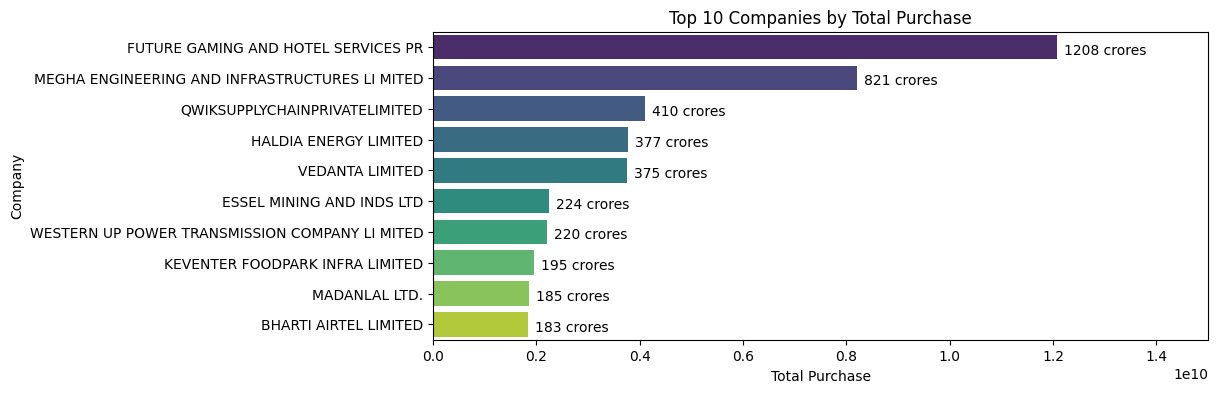

In [182]:
top_10_companies['Label'] = top_10_companies['Total_purchase'].apply(lambda x: str(int(x / 10000000)) + ' crores')
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Total_purchase', y='Purchaser Name', data=top_10_companies, palette='viridis')
for i, p in enumerate(ax.patches):
    ax.annotate(top_10_companies['Label'].iloc[i], 
                 (p.get_width(), p.get_y() + p.get_height() / 2), 
                 xytext=(5, -2), 
                 textcoords='offset points',
                 ha='left', va='center', fontsize=10, color='black')
plt.title('Top 10 Companies by Total Purchase')
  
plt.xlabel('Total Purchase')
plt.ylabel('Company')
plt.xlim(0, 1.5e10)
plt.show()

## **Top 10 Political Parties** that recieved the most donation.
* BJP is way ahead of every other political party making approximately 5 times the next party in line.
* All India Trinamool Congress is of significance here because being a regional party it has exceeded the donation of a national party(All India Congress)

In [188]:
parties_data = df2.groupby('Name of the Political Party')['Denomination'].sum().reset_index()
top_10_political = parties_data.sort_values(by='Denomination', ascending=False).head(10)
top_10_political

,Name of the Political Party,Denomination
5,BHARTIYA JANTA PARTY,6.060511e+10
3,ALL INDIA TRINAMOOL CONGRESS,1.609531e+10
17,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",1.421866e+10
4,BHARAT RASHTRA SAMITHI,1.214710e+10
7,BIJU JANATA DAL,7.755000e+09
8,DMK PARTY IN PARLIAMENT,6.390000e+09
26,YSR CONGRESS PARTY (YUVAJANA SRAMIKA R,3.370000e+09
25,TELUGU DESAM PARTY,2.188800e+09
22,SHIVSENA (POLITICAL PARTY),1.583814e+09
19,RASTRIYA JANTA DAL,7.250000e+08


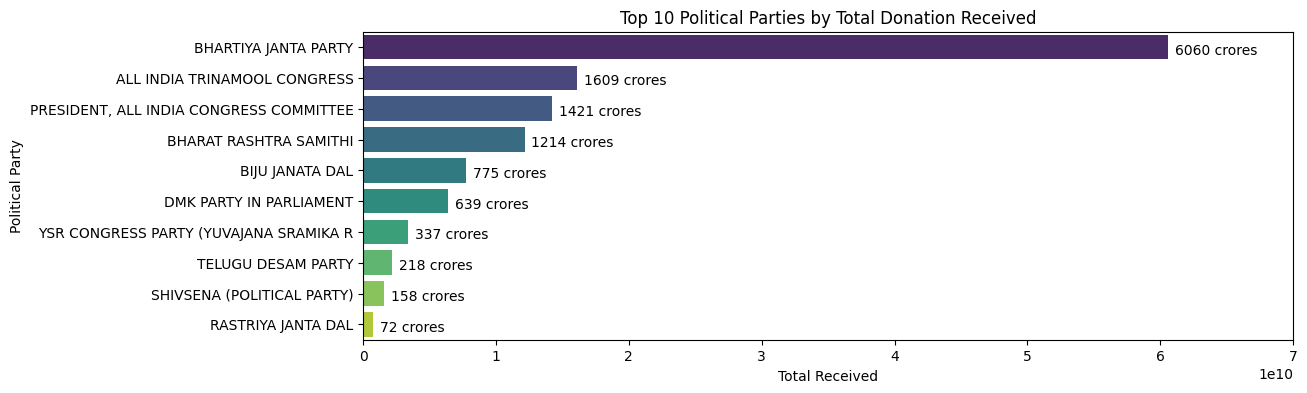

In [189]:
top_10_political['Label'] = top_10_political['Denomination'].apply(lambda x: str(int(x / 10000000)) + ' crores')

plt.figure(figsize=(12, 4))
ax = sns.barplot(x='Denomination', y='Name of the Political Party', data=top_10_political, palette='viridis')

for i, p in enumerate(ax.patches):
    ax.annotate(top_10_political['Label'].iloc[i], 
                 (p.get_width(), p.get_y() + p.get_height() / 2), 
                 xytext=(5, -2), 
                 textcoords='offset points',
                 ha='left', va='center', fontsize=10, color='black')

plt.title('Top 10 Political Parties by Total Donation Received')
plt.xlabel('Total Received')
plt.ylabel('Political Party')

plt.xlim(0, 7e10)
plt.show()

## The share of total donations received by each political party.

In [194]:
bjp_total = df2[df2['Name of the Political Party'] == 'BHARTIYA JANTA PARTY']['Denomination'].sum()
tmc_total = df2[df2['Name of the Political Party'] == 'ALL INDIA TRINAMOOL CONGRESS']['Denomination'].sum()
congress_total = df2[df2['Name of the Political Party'] == 'PRESIDENT, ALL INDIA CONGRESS COMMITTEE']['Denomination'].sum()
brs_total = df2[df2['Name of the Political Party'] == 'BHARAT RASHTRA SAMITHI']['Denomination'].sum()
bjd_total = df2[df2['Name of the Political Party'] == 'BIJU JANATA DAL']['Denomination'].sum()

other_parties_total = df2[~df2['Name of the Political Party'].isin(['BHARTIYA JANTA PARTY', 'ALL INDIA TRINAMOOL CONGRESS', 'PRESIDENT, ALL INDIA CONGRESS COMMITTEE', 'BHARAT RASHTRA SAMITHI', 'BIJU JANATA DAL'])]['Denomination'].sum()

total_donation = df2['Denomination'].sum() 


tmc_percentage = (tmc_total / total_donation) * 100
bjp_percentage = (bjp_total / total_donation) * 100
congress_percentage = (congress_total / total_donation) * 100
brs_percentage = (brs_total / total_donation) * 100
bjd_percentage = (bjd_total/total_donation)*100
others_parties_percentage = (other_parties_total/total_donation)*100

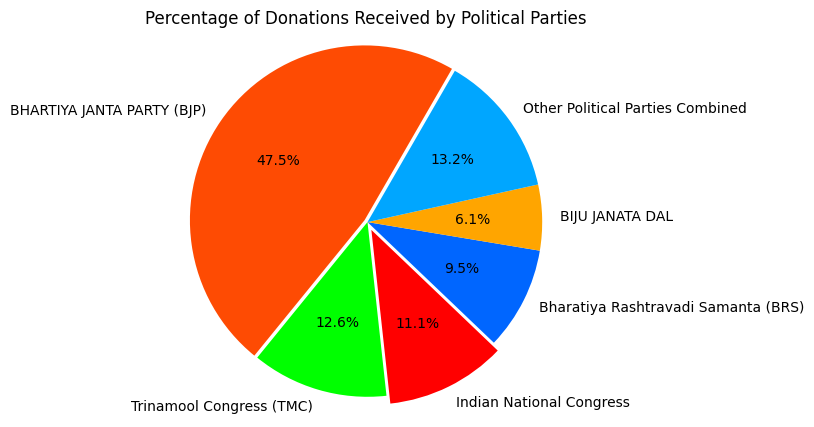

In [196]:
labels = ['BHARTIYA JANTA PARTY (BJP)', 'Trinamool Congress (TMC)',  'Indian National Congress','Bharatiya Rashtravadi Samanta (BRS)','BIJU JANATA DAL', 'Other Political Parties Combined']
sizes = [bjp_percentage, tmc_percentage,  congress_percentage,brs_percentage, bjd_percentage, others_parties_percentage]

explode = (0.02, 0, 0.05, 0, 0, 0)  # Explode the first slice (BJP)
colors = ['#fe4b03', '#00ff00', '#ff0000', '#0066ff', '#ffa500', '#00a6ff']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60, colors=colors, explode=explode)
plt.title("Percentage of Donations Received by Political Parties")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.show()

## Tracking the Donations made by Individual companies 
* we will consider only the top 5 companies and analyze them individually to track the timing of their donations.

### 1. FUTURE GAMING AND HOTEL SERVICES PR

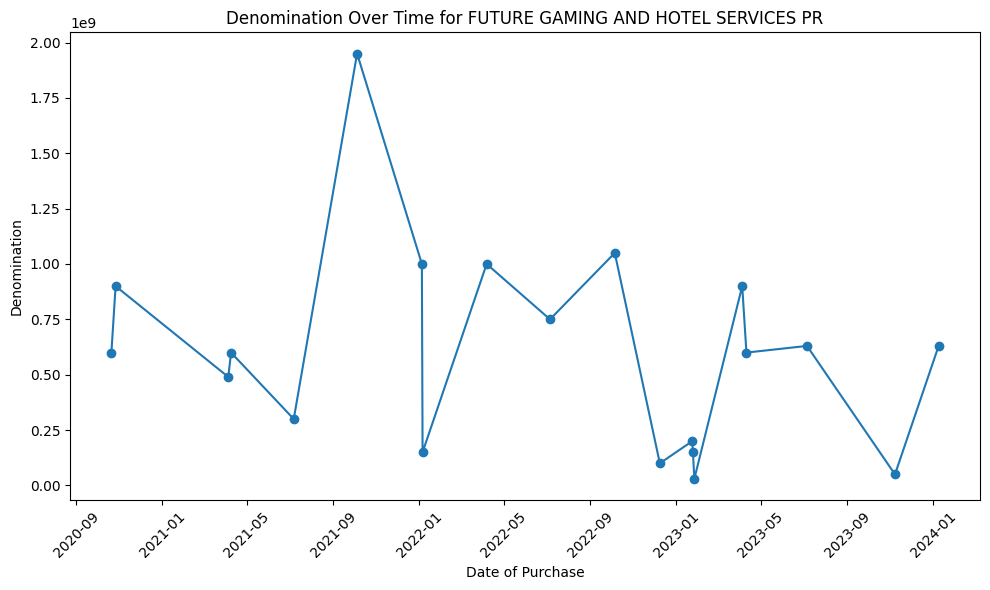

In [197]:
future = df[df['Purchaser Name'] == 'FUTURE GAMING AND HOTEL SERVICES PR'].copy()  

future.loc[:, 'Date of Purchase'] = pd.to_datetime(future['Date of Purchase'])
future_grouped = future.groupby('Date of Purchase')['Denomination'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(future_grouped['Date of Purchase'], future_grouped['Denomination'], marker='o', linestyle='-')
plt.title('Denomination Over Time for FUTURE GAMING AND HOTEL SERVICES PR')
plt.xlabel('Date of Purchase')
plt.ylabel('Denomination')
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### 2. MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED

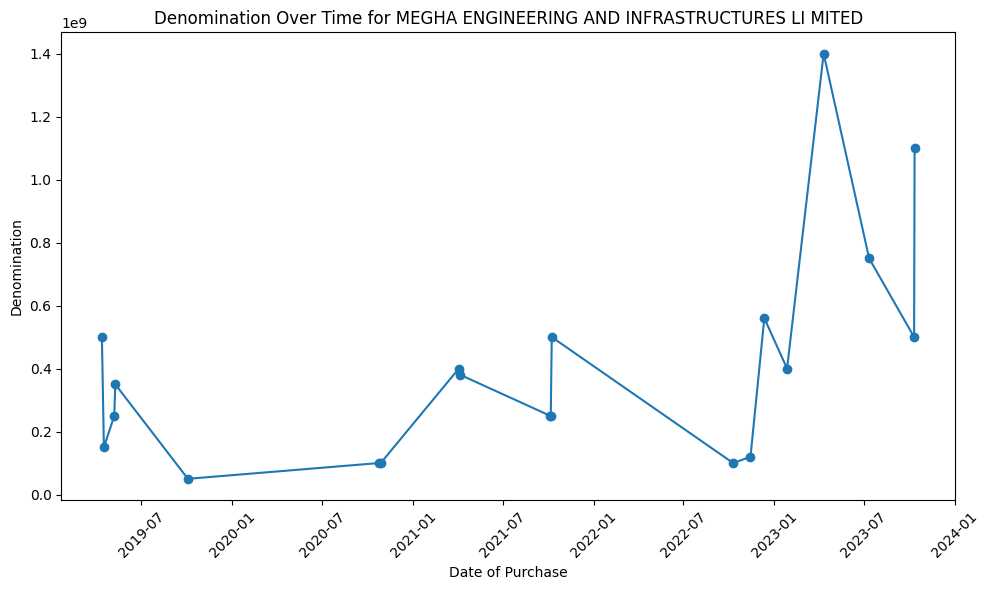

In [198]:
Megha = df[df['Purchaser Name'] =='MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED' ].copy()  

Megha.loc[:, 'Date of Purchase'] = pd.to_datetime(Megha['Date of Purchase'])
Megha_grouped = Megha.groupby('Date of Purchase')['Denomination'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(Megha_grouped['Date of Purchase'], Megha_grouped['Denomination'], marker='o', linestyle='-')
plt.title('Denomination Over Time for MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED')
plt.xlabel('Date of Purchase')
plt.ylabel('Denomination')
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### 3. QWIK SUPPLY CHAIN PRIVATE LIMITED

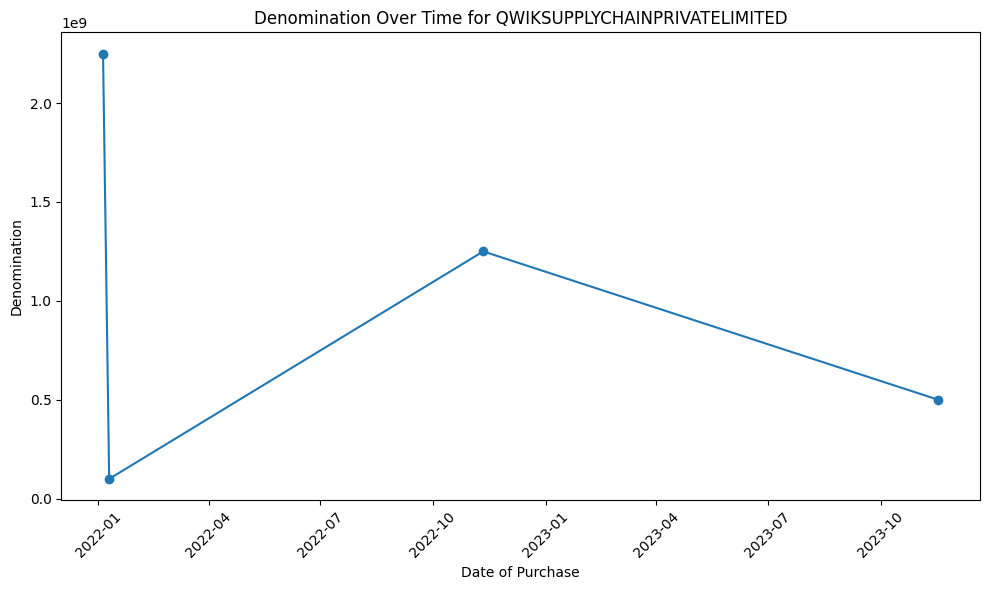

In [199]:
qwik = df[df['Purchaser Name'] =='QWIKSUPPLYCHAINPRIVATELIMITED' ].copy()  

qwik.loc[:, 'Date of Purchase'] = pd.to_datetime(qwik['Date of Purchase'])
qwik_grouped = qwik.groupby('Date of Purchase')['Denomination'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(qwik_grouped['Date of Purchase'], qwik_grouped['Denomination'], marker='o', linestyle='-')
plt.title('Denomination Over Time for QWIKSUPPLYCHAINPRIVATELIMITED')
plt.xlabel('Date of Purchase')
plt.ylabel('Denomination')
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### 4. HALDIA ENERGY LIMITED

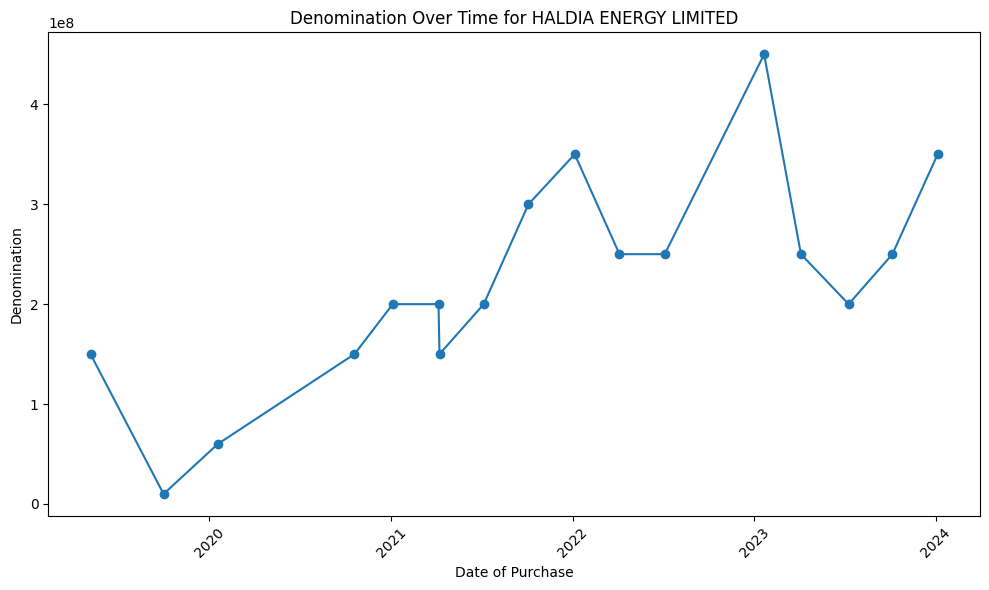

In [201]:
haldia = df[df['Purchaser Name'] == 'HALDIA ENERGY LIMITED' ].copy()  

haldia.loc[:, 'Date of Purchase'] = pd.to_datetime(haldia['Date of Purchase'], format='%d/%b/%Y')
haldia_grouped = haldia.groupby('Date of Purchase')['Denomination'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(haldia_grouped['Date of Purchase'], haldia_grouped['Denomination'], marker='o', linestyle='-')
plt.title('Denomination Over Time for HALDIA ENERGY LIMITED')
plt.xlabel('Date of Purchase')
plt.ylabel('Denomination')
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### 5. VEDANTA LIMITED

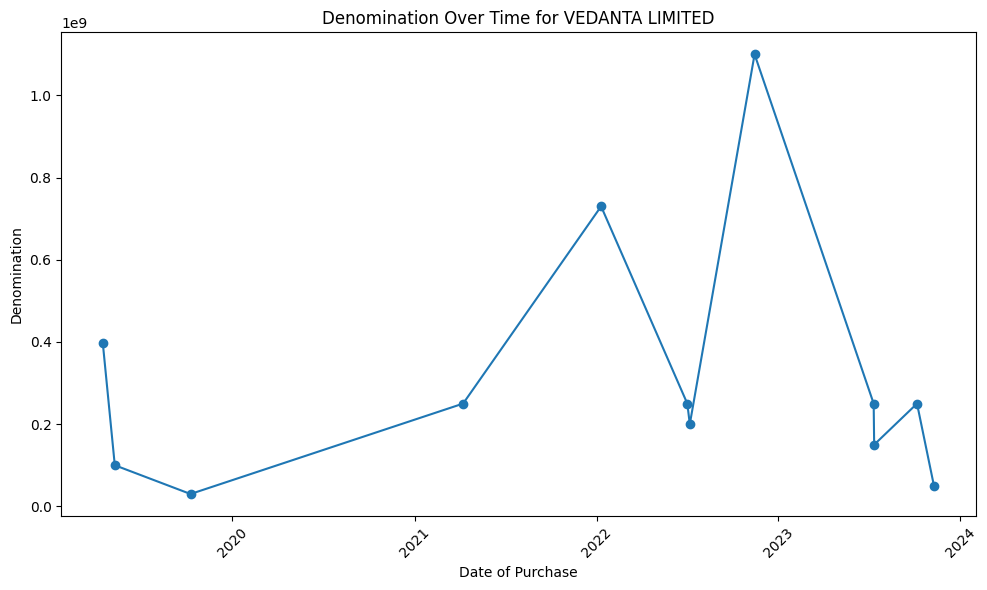

In [200]:
vedanta = df[df['Purchaser Name'] == 'VEDANTA LIMITED' ].copy()  

vedanta.loc[:, 'Date of Purchase'] = pd.to_datetime(vedanta['Date of Purchase'], format='%d/%b/%Y')
vedanta_grouped = vedanta.groupby('Date of Purchase')['Denomination'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(vedanta_grouped['Date of Purchase'], vedanta_grouped['Denomination'], marker='o', linestyle='-')
plt.title('Denomination Over Time for VEDANTA LIMITED')
plt.xlabel('Date of Purchase')
plt.ylabel('Denomination')
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Year-wise Donations
* First we need to strip the 'year' from the 'Date_of_Encashment' column and place it in a new column called 'Year'
* After that we will see total amount of donation recieved per year

In [8]:
df2['Date_of_Encashment'] = pd.to_datetime(df2['Date_of_Encashment'], format='%d/%b/%Y')
df2['Year'] = df2['Date_of_Encashment'].dt.year
df2

,Date_of_Encashment,Name of the Political Party,Denomination,Year
0,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0,2019
1,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0,2019
2,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000.0,2019
3,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0,2019
4,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0,2019
...,...,...,...,...
20416,2024-01-24,JANASENA PARTY,1000000.0,2024
20417,2024-01-24,JANASENA PARTY,1000000.0,2024
20418,2024-01-24,JANASENA PARTY,1000000.0,2024
20419,2024-01-24,JANASENA PARTY,1000000.0,2024


#### Here we need to exclude year 2024 as only the first month of this year is taken into account and thus can skew the whole analysis

In [9]:
amount_by_year = df2.groupby('Year')['Denomination'].sum().reset_index()[['Year', 'Denomination']]
amount_by_year = amount_by_year[amount_by_year['Year'] != 2024]
amount_by_year

,Year,Denomination
0,2019,2.385089e+10
1,2020,3.639600e+09
2,2021,1.502262e+10
3,2022,3.701457e+10
4,2023,4.246271e+10


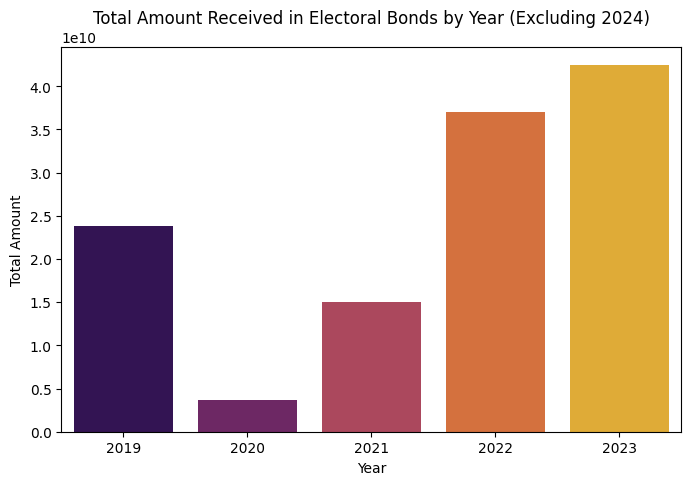

In [10]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Year', y='Denomination', data=amount_by_year, palette = 'inferno')
for bar in ax.patches:
    bar.set_width(0.8)
plt.title('Total Amount Received in Electoral Bonds by Year (Excluding 2024)')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.show()

In [ ]:
#### To do justice to year 2024 we compare donations made in the first month of every ye

In [11]:
first_month_by_year = df2[df2['Date_of_Encashment'].dt.month == 1]
first_month_by_year = first_month_by_year.groupby(first_month_by_year['Date_of_Encashment'].dt.year)['Denomination'].sum().reset_index()
first_month_by_year.rename(columns={'Date_of_Encashment': 'Year', 'Denomination': 'Total Denomination'}, inplace=True)

print(first_month_by_year)

   Year  Total Denomination
0  2020        7.867000e+08
1  2021        4.207000e+08
2  2022        1.212860e+10
3  2023        1.804600e+09
4  2024        5.700500e+09


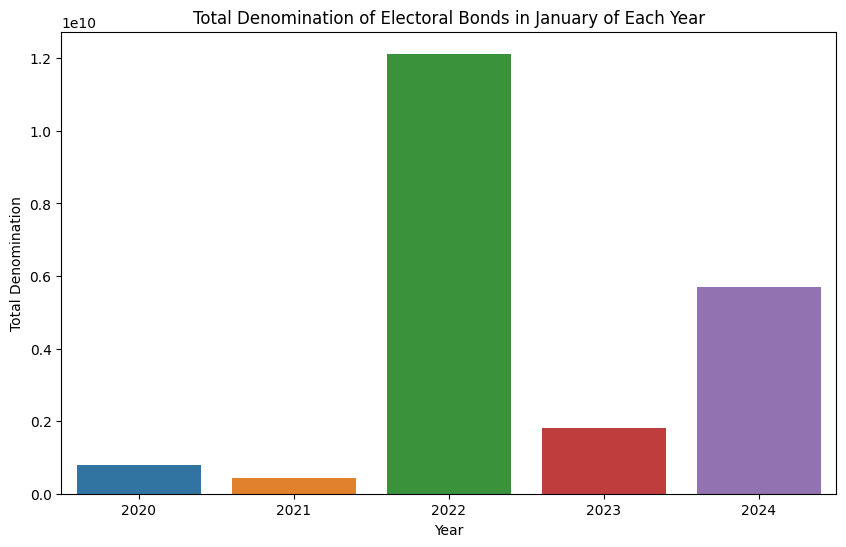

In [12]:
# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total Denomination', data=first_month_by_year)
plt.title('Total Denomination of Electoral Bonds in January of Each Year')
plt.xlabel('Year')
plt.ylabel('Total Denomination')
plt.show()